## Problem statement - Fake News Classifier
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate or false information acquires a tremendous potential to cause real world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. . The sensationalism of not-so-accurate eye catching and intriguing headlines aimed at retaining the attention of audiences to sell information has persisted all throughout the history of all kinds of information broadcast. On social networking websites, the reach and effects of information spread are however significantly amplified and occur at such a fast pace, that distorted, inaccurate or false information acquires a tremendous potential to cause real impacts, within minutes, for millions of user


In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Basic libraries
import pandas as pd 
import numpy as np 

In [3]:
#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### Importing the dataset

In [4]:
fake_news = pd.read_csv('E://dataset//dataset//fakenews//Fake_news//Fake.csv')
true_news = pd.read_csv('E://dataset//dataset//fakenews//Fake_news//True.csv')

In [5]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_news.shape

(23481, 4)

In [8]:
true_news.shape

(21417, 4)

In [9]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


### Dataset Details
This metadata has two csv files where one dataset contains fake news and the other contains true/real news and has nearly 23481 fake news and 21417 true news

### Description of columns in the file:

1.title- contains news headlines

2.text-contains news content

3.subject- type of news

4.date- date the news was published

### Preprocessing and Cleaning
We have to perform  preprocessing steps before performing EDA.

In [11]:
#Target variable for fake news
fake_news['output']=0

#Target variable for true news
true_news['output']=1

In [12]:
#Concatenating and dropping for fake news
fake_news['news']=fake_news['title']+fake_news['text']
fake_news=fake_news.drop(['title', 'text'], axis=1)

In [13]:
#Concatenating and dropping for true news
true_news['news']=true_news['title']+true_news['text']
true_news=true_news.drop(['title', 'text'], axis=1)

In [14]:
#Rearranging the columns
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]

In [15]:
#Converting the date columns to datetime format
fake_news['date'].value_counts()

May 10, 2017                                                                                                                46
May 26, 2016                                                                                                                44
May 5, 2016                                                                                                                 44
May 6, 2016                                                                                                                 44
May 11, 2016                                                                                                                43
                                                                                                                            ..
December 19, 2017                                                                                                            1
December 4, 2017                                                                                               

In [16]:
fake_news=fake_news[~fake_news.date.str.contains("http")]
fake_news=fake_news[~fake_news.date.str.contains("HOST")]
fake_news.head()

,subject,date,news,output
0,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,0
1,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,0
2,News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,0
3,News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,0


In [17]:
fake_news['date'].value_counts()

May 10, 2017         46
May 5, 2016          44
May 26, 2016         44
May 6, 2016          44
May 11, 2016         43
                     ..
Jun 7, 2015           1
December 11, 2017     1
Jun 21, 2015          1
October 9, 2017       1
December 4, 2017      1
Name: date, Length: 1675, dtype: int64

In [18]:
#Converting the date to datetime format
fake_news['date'] = pd.to_datetime(fake_news['date'].str.strip(), dayfirst=True)
true_news['date'] = pd.to_datetime(true_news['date'].str.strip(), dayfirst=True)

In [19]:
#Appending two datasets
data = [fake_news, true_news]
new_dataset = pd.concat(data)
new_dataset

,subject,date,news,output
0,News,2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,0
1,News,2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,0
2,News,2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,0
3,News,2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...
21412,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1


In [20]:
df=new_dataset.copy()
def cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['news']=df['news'].apply(lambda x:cleaning(x))
df.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends out embarrassing new year’...,0
1,News,2017-12-31,drunk bragging trump staffer started russian ...,0
2,News,2017-12-30,sheriff david clarke becomes an internet joke...,0
3,News,2017-12-29,trump is so obsessed he even has obama’s name...,0
4,News,2017-12-25,pope francis just called out donald trump dur...,0


In [21]:
#preprocessing the data
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends out embarrassing new year’...,0
1,News,2017-12-31,drunk bragging trump staffer started russian ...,0
2,News,2017-12-30,sheriff david clarke becomes an internet joke...,0
3,News,2017-12-29,trump is so obsessed he even has obama’s name...,0
4,News,2017-12-25,pope francis just called out donald trump dur...,0


In [22]:
#Function to get top n words
def top_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    words = vec.transform(corpus)
    sum = words.sum(axis=0) 
    words_freq = [(word, sum[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [23]:
#Calling function and return only top 20 words
common_words = top_words(df['news'], 20)
for word, freq in common_words:
    print('word:', word, ':', 'count:',freq)

word: the : count: 1013570
word: to : count: 551828
word: of : count: 448644
word: and : count: 410084
word: in : count: 353762
word: that : count: 239260
word: on : count: 196149
word: for : count: 179071
word: is : count: 169230
word: trump : count: 140400
word: he : count: 133510
word: said : count: 130258
word: it : count: 128983
word: with : count: 121215
word: was : count: 116587
word: as : count: 104887
word: his : count: 97825
word: by : count: 96871
word: has : count: 89423
word: be : count: 84260


In [24]:
##seaborn countplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="output", data=df)
plt.title("Count of fake and true news")

Text(0.5, 1.0, 'Count of fake and true news')

In [25]:
#Function to get top bigram words
def top_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    words = vec.transform(corpus)
    sum_ = words.sum(axis=0) 
    words_freq = [(word, sum_[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
#Calling function and return only top 20 words
common_words = top_bigram(df['news'], 20)
for word, freq in common_words:
    print('word:', word, ':', 'count:',freq)

word: of the : count: 102320
word: in the : count: 81809
word: to the : count: 50432
word: on the : count: 35668
word: for the : count: 31587
word: to be : count: 26594
word: and the : count: 26507
word: donald trump : count: 25051
word: that the : count: 24800
word: at the : count: 23626
word: with the : count: 23058
word: the united : count: 21087
word: by the : count: 20763
word: the us : count: 19960
word: from the : count: 19141
word: united states : count: 18394
word: white house : count: 15485
word: said the : count: 14951
word: has been : count: 14379
word: that he : count: 13978


In [27]:
#Function to get top trigram words
def top_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    words = vec.transform(corpus)
    sum_ = words.sum(axis=0) 
    words_freq = [(word, sum_[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [28]:
#Calling function and return only top 20 words
common_words = top_trigram(df['news'], 20)
for word, freq in common_words:
    print('word:', word, ':', 'count:',freq)

word: president donald trump : count: 6806
word: president barack obama : count: 3735
word: new york times : count: 2034
word: donald trump realdonaldtrump : count: 1790
word: reuters president donald : count: 1476
word: black lives matter : count: 1431
word: president united states : count: 1096
word: white house said : count: 1050
word: presidentelect donald trump : count: 1043
word: new york city : count: 1006
word: president vladimir putin : count: 955
word: news century wire : count: 951
word: national security adviser : count: 898
word: affordable care act : count: 868
word: director james comey : count: 860
word: speaker paul ryan : count: 851
word: fbi director james : count: 777
word: state rex tillerson : count: 775
word: secretary state rex : count: 765
word: russian president vladimir : count: 745


In [29]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

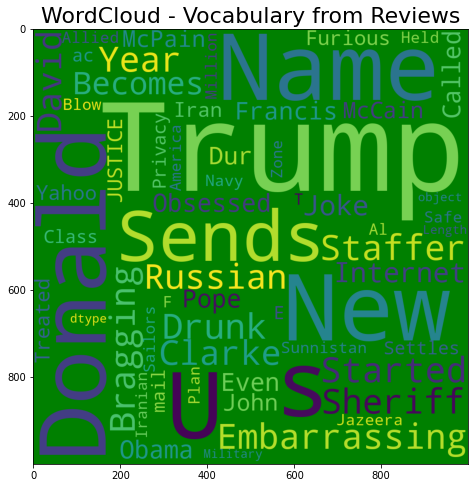

In [30]:
text = fake_news["news"]
wordcloud = WordCloud(background_color = 'green', width = 1000, height = 1000, stopwords = STOPWORDS).generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

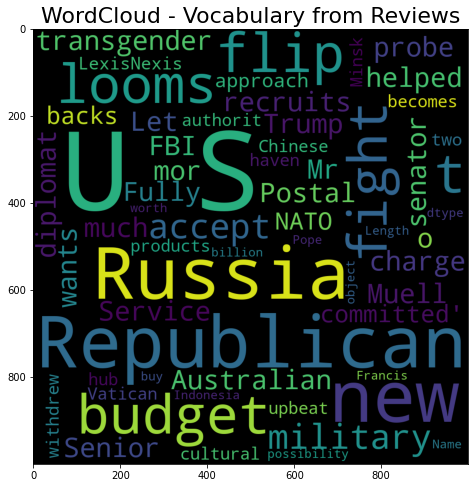

In [31]:
text = true_news["news"]
wordcloud = WordCloud(background_color = 'black', width = 1000, height = 1000, stopwords = STOPWORDS).generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [32]:
#Extracting 'reviews' for processing
news_data=df.copy()
news_data=news_data[['news']].reset_index(drop=True)
news_data.head()

,news
0,donald trump sends out embarrassing new year’...
1,drunk bragging trump staffer started russian ...
2,sheriff david clarke becomes an internet joke...
3,trump is so obsessed he even has obama’s name...
4,pope francis just called out donald trump dur...


In [33]:
news_data.shape

(44888, 1)

### Stemming 
Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. 

For example,
history->histori
Finally->fina

If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Simce it takes time. I'm using stemming

In [34]:
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

In [36]:
#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_data)):
    news = re.sub('[^a-zA-Z]', ' ', news_data['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)  

In [37]:
corpus[1]

'drunk brag trump staffer start russian collus investigationhous intellig committe chairman devin nune go bad day assumpt like mani us christoph steeledossi prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york timesform trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clintonon top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah elsisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boyin may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt thendemocrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici p

### TFIDF(Term Frequency — Inverse Document Frequency)
TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.
Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the news.

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf_vectorizer.fit_transform(news_data['news'])
X.shape

(44888, 5000)

In [39]:
#Getting the target variable
y=df['output']

### Day 2 Task

### Word2Vec -- Vectorization 
Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.
Word embedding is the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

In [40]:
import gensim
import nltk
from nltk.corpus import stopwords
import re

In [41]:
df1=df.copy()
df1=df1[['news']].reset_index(drop=True)
df1.head()

,news
0,donald trump sends out embarrassing new year’...
1,drunk bragging trump staffer started russian ...
2,sheriff david clarke becomes an internet joke...
3,trump is so obsessed he even has obama’s name...
4,pope francis just called out donald trump dur...


In [42]:
df1.shape

(44888, 1)

In [43]:
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
#splitting and adding the stemmed words except stopwords
corpus1 = []
for i in range(0, len(df1)):
    news = re.sub('[^a-zA-Z]', ' ', df1['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus1.append(news)  

In [44]:
corpus1[1]

'drunk brag trump staffer start russian collus investigationhous intellig committe chairman devin nune go bad day assumpt like mani us christoph steeledossi prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york timesform trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clintonon top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah elsisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boyin may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt thendemocrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici p

In [45]:
X1 = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df1["news"].values:
    temp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        temp.extend(filtered_words)
    X1.append(temp)

In [46]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X1, size=EMBEDDING_DIM, window=5, min_count=1)

In [47]:
#vocab size
len(w2v_model.wv.vocab)

219012

In [48]:
#see a sample vector for random word, lets say Corona 
w2v_model["trump"]

array([ 2.2121763 , -0.04253436, -2.4211857 ,  0.24280795, -0.20357934,
       -0.62612253, -1.4849434 , -1.9247683 , -0.16428436, -0.56415796,
       -1.1354725 ,  2.362691  , -0.39128345, -0.5301592 , -0.48435575,
        1.0935235 ,  0.25691584,  2.8996742 ,  1.0126399 , -0.98695046,
       -2.6391265 ,  0.1764777 ,  0.34829548,  0.6691574 , -0.11990207,
        0.69909674,  2.751036  , -0.91732574,  1.3734087 , -0.99076515,
        0.06245931,  4.0370307 , -0.6008222 ,  1.9023764 ,  2.947813  ,
       -2.3571718 ,  2.0871453 , -1.5510064 , -0.33711675,  0.8842626 ,
        0.45696583, -0.6450854 , -1.7465974 , -0.34782234, -1.2667068 ,
       -3.0215867 ,  0.09655878, -1.2077161 , -1.2111449 ,  0.04733181,
        1.3451438 ,  2.3075798 , -0.96322656,  1.3808304 ,  3.9988782 ,
        1.1229974 , -0.36907277,  2.1039615 , -1.9157379 ,  1.4518477 ,
        0.64476234,  0.9533515 , -1.2088871 , -1.5834299 ,  0.71617544,
       -0.3289287 , -1.7079862 ,  0.2963554 ,  0.5237787 , -1.04

In [49]:
w2v_model.wv.most_similar("iran")

[('tehran', 0.8787291646003723),
 ('iranian', 0.7448481917381287),
 ('nuclear', 0.6180054545402527),
 ('iranians', 0.6175577640533447),
 ('destabilizing', 0.6110596656799316),
 ('qatar', 0.6084328889846802),
 ('usiran', 0.6013638973236084),
 ('jcpoa', 0.5966141819953918),
 ('pyongyang', 0.5945923328399658),
 ('hezbollah', 0.5846118330955505)]

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X1)
X1 = tokenizer.texts_to_sequences(X1)

In [51]:
# lets check the first 10 words of first news
#every word has been represented with a number
X1[0][:10]

[15, 1, 4578, 2509, 9, 35, 4427, 499, 120165, 1]

In [52]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} : {num}")
    if num == 10:
        break     

trump : 1
said : 2
us : 3
would : 4
president : 5
people : 6
one : 7
state : 8
new : 9
also : 10


In [53]:
num = np.array([len(x1) for x1 in X1])
len(num[num  < 700])

44088

In [54]:
#Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlength = 700 

In [55]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [56]:
#Making all news of size maxlen defined above
X1 = pad_sequences(X1, maxlen=maxlength)

In [57]:
len(X1[0])

700

In [58]:
vocab_size = len(tokenizer.word_index) + 1

In [59]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [60]:
word_index

{'trump': 1,
 'said': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'state': 8,
 'new': 9,
 'also': 10,
 'obama': 11,
 'clinton': 12,
 'house': 13,
 'government': 14,
 'donald': 15,
 'reuters': 16,
 'states': 17,
 'republican': 18,
 'could': 19,
 'white': 20,
 'told': 21,
 'united': 22,
 'like': 23,
 'campaign': 24,
 'news': 25,
 'last': 26,
 'party': 27,
 'two': 28,
 'election': 29,
 'time': 30,
 'first': 31,
 'hillary': 32,
 'former': 33,
 'even': 34,
 'year': 35,
 'country': 36,
 'many': 37,
 'years': 38,
 'security': 39,
 'media': 40,
 'may': 41,
 'say': 42,
 'political': 43,
 'national': 44,
 'court': 45,
 'police': 46,
 'get': 47,
 'made': 48,
 'law': 49,
 'make': 50,
 'american': 51,
 'republicans': 52,
 'going': 53,
 'since': 54,
 'percent': 55,
 'russia': 56,
 'presidential': 57,
 'bill': 58,
 'administration': 59,
 'back': 60,
 'america': 61,
 'senate': 62,
 'says': 63,
 'north': 64,
 'support': 65,
 'democratic': 66,
 'vote': 67,
 'week': 68,
 'group':

In [61]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
weight = get_weight_matrix(w2v_model, word_index)

In [62]:
weight

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.21217632e+00, -4.25343551e-02, -2.42118573e+00, ...,
         1.04848921e+00,  5.53903639e-01, -4.43039685e-01],
       [-9.16539967e-01, -2.72089767e+00, -2.21463394e+00, ...,
         8.34361557e-03, -8.96540165e-01,  2.31265283e+00],
       ...,
       [ 3.87548306e-03,  1.04785701e-02,  1.27010997e-02, ...,
         2.31144726e-02,  5.34675492e-04,  1.99328326e-02],
       [ 6.80237683e-03,  7.37823965e-03,  6.16552820e-03, ...,
        -2.43227109e-02,  1.53537588e-02, -2.65230145e-02],
       [ 9.47132427e-03,  9.05193563e-04, -1.86757755e-03, ...,
        -8.52891617e-03,  1.16271898e-02, -2.19820235e-02]])

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [69]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [71]:
#Defining Neural Network #LSTM 
model1 = Sequential()
#Non-trainable embeddidng layer
model1.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[weight], input_length=maxlength, trainable=False))
model1.add(Dropout(0.3))
model1.add(LSTM(units=128))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [72]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 700, 100)          21901300  
_________________________________________________________________
dropout (Dropout)            (None, 700, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 22,018,677
Trainable params: 117,377
Non-trainable params: 21,901,300
_________________________________________________________________


In [73]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X1, y)

In [74]:
model1.fit(X_train, y_train, validation_split=0.3, epochs=8)

Epoch 1/8
737/737 [==============================] - 290s 391ms/step - loss: 0.1961 - acc: 0.9227 - val_loss: 0.0752 - val_acc: 0.9740
Epoch 2/8
737/737 [==============================] - 288s 390ms/step - loss: 0.0789 - acc: 0.9717 - val_loss: 0.0679 - val_acc: 0.9769
Epoch 3/8
737/737 [==============================] - 276s 374ms/step - loss: 0.0449 - acc: 0.9839 - val_loss: 0.0280 - val_acc: 0.9900
Epoch 4/8
737/737 [==============================] - 278s 377ms/step - loss: 0.0456 - acc: 0.9846 - val_loss: 0.0343 - val_acc: 0.9892
Epoch 5/8
737/737 [==============================] - 278s 378ms/step - loss: 0.0348 - acc: 0.9889 - val_loss: 0.0297 - val_acc: 0.9922
Epoch 6/8
737/737 [==============================] - 279s 379ms/step - loss: 0.0306 - acc: 0.9901 - val_loss: 0.0288 - val_acc: 0.9907
Epoch 7/8
737/737 [==============================] - 279s 379ms/step - loss: 0.0236 - acc: 0.9927 - val_loss: 0.0220 - val_acc: 0.9938
Epoch 8/8
737/737 [==============================] - 28

In [75]:
# Save entire model to a HDFS file
model1.save("LSTMRNN_Model1.h5")

In [76]:
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred1 = (model1.predict(X_test) >= 0.5).astype("int")

In [77]:
accuracy_score(y_test, y_pred1)

0.994475138121547

In [78]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5860
           1       0.99      1.00      0.99      5362

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



### Day 3 Task

In [79]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [88]:
#creating model adding dropout
model2=Sequential()
model2.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[weight], input_length=maxlength, trainable=False))
model2.add(Dropout(0.3))
model2.add(Bidirectional(LSTM(100)))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 700, 100)          21901300  
_________________________________________________________________
dropout_3 (Dropout)          (None, 700, 100)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 22,062,301
Trainable params: 161,001
Non-trainable params: 21,901,300
_________________________________________________________________
None


In [89]:
model2.fit(X_train, y_train, validation_split=0.3, epochs=7)

Epoch 1/7
737/737 [==============================] - 313s 423ms/step - loss: 0.2036 - accuracy: 0.9188 - val_loss: 0.0767 - val_accuracy: 0.9821
Epoch 2/7
737/737 [==============================] - 310s 421ms/step - loss: 0.1185 - accuracy: 0.9538 - val_loss: 0.0895 - val_accuracy: 0.9647
Epoch 3/7
737/737 [==============================] - 311s 423ms/step - loss: 0.0737 - accuracy: 0.9725 - val_loss: 0.0480 - val_accuracy: 0.9834
Epoch 4/7
737/737 [==============================] - 269s 365ms/step - loss: 0.0507 - accuracy: 0.9817 - val_loss: 0.0439 - val_accuracy: 0.9842
Epoch 5/7
737/737 [==============================] - 266s 361ms/step - loss: 0.0432 - accuracy: 0.9841 - val_loss: 0.0341 - val_accuracy: 0.9875
Epoch 6/7
737/737 [==============================] - 270s 366ms/step - loss: 0.0434 - accuracy: 0.9844 - val_loss: 0.0376 - val_accuracy: 0.9867
Epoch 7/7
737/737 [==============================] - 1072s 1s/step - loss: 0.0437 - accuracy: 0.9851 - val_loss: 0.0385 - val_accu

In [90]:
# Save entire model to a HDFS file
model2.save("Bi-directional_LSTMRNN_Model2.h5")

In [91]:
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred2 = (model2.predict(X_test) >= 0.5).astype("int")

In [92]:
accuracy_score(y_test, y_pred2)

0.9861878453038674

In [94]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5860
           1       0.99      0.98      0.99      5362

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



In [95]:
#creating model adding dropout
model3=Sequential()
model3.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[weight], input_length=maxlength, trainable=False))
model3.add(Dropout(0.3))
model3.add(Bidirectional(LSTM(64)))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model3.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 700, 100)          21901300  
_________________________________________________________________
dropout_4 (Dropout)          (None, 700, 100)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               84480     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 21,985,909
Trainable params: 84,609
Non-trainable params: 21,901,300
_________________________________________________________________
None


In [97]:
model3.fit(X_train, y_train, validation_split=0.3, epochs=7)

Epoch 1/7
737/737 [==============================] - 187s 253ms/step - loss: 0.1361 - accuracy: 0.9519 - val_loss: 0.0892 - val_accuracy: 0.9700
Epoch 2/7
737/737 [==============================] - 196s 266ms/step - loss: 0.0537 - accuracy: 0.9826 - val_loss: 0.0331 - val_accuracy: 0.9887
Epoch 3/7
737/737 [==============================] - 217s 295ms/step - loss: 0.0495 - accuracy: 0.9835 - val_loss: 0.0334 - val_accuracy: 0.9901
Epoch 4/7
737/737 [==============================] - 199s 270ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 5/7
737/737 [==============================] - 207s 281ms/step - loss: 0.0423 - accuracy: 0.9857 - val_loss: 0.1018 - val_accuracy: 0.9633
Epoch 6/7
737/737 [==============================] - 199s 270ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0264 - val_accuracy: 0.9918
Epoch 7/7
737/737 [==============================] - 196s 266ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0234 - val_ac

In [98]:
# Save entire model to a HDFS file
model3.save("Bi-directional_LSTMRNN_Model3.h5")

In [99]:
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred3 = (model3.predict(X_test) >= 0.5).astype("int")

In [100]:
accuracy_score(y_test, y_pred3)

0.993316699340581

In [101]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5860
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



In [102]:
from tensorflow.keras import layers

In [103]:
#Defining Neural Network
model4 = Sequential()
#Non-trainable embeddidng layer
model4.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[weight], input_length=maxlength, trainable=False))
model4.add(layers.GRU(64, return_sequences=True))
model4.add(layers.SimpleRNN(128))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [104]:
print(model4.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 700, 100)          21901300  
_________________________________________________________________
gru (GRU)                    (None, 700, 64)           31872     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               24704     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 21,958,005
Trainable params: 56,705
Non-trainable params: 21,901,300
_________________________________________________________________
None


In [105]:
model4.fit(X_train, y_train, validation_split=0.3, epochs=5)

Epoch 1/5
737/737 [==============================] - 214s 288ms/step - loss: 0.1878 - acc: 0.9260 - val_loss: 0.0779 - val_acc: 0.9738
Epoch 2/5
737/737 [==============================] - 218s 296ms/step - loss: 0.0482 - acc: 0.9833 - val_loss: 0.0288 - val_acc: 0.9899
Epoch 3/5
737/737 [==============================] - 215s 292ms/step - loss: 0.0271 - acc: 0.9918 - val_loss: 0.0241 - val_acc: 0.9924
Epoch 4/5
737/737 [==============================] - 241s 327ms/step - loss: 0.0172 - acc: 0.9949 - val_loss: 0.0214 - val_acc: 0.9935
Epoch 5/5
737/737 [==============================] - 235s 319ms/step - loss: 0.0115 - acc: 0.9966 - val_loss: 0.0224 - val_acc: 0.9925


In [106]:
# Save entire model to a HDFS file
model4.save("GRU_RNN_Model4.h5")

In [107]:
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred4 = (model4.predict(X_test) >= 0.5).astype("int")

In [108]:
accuracy_score(y_test, y_pred4)

0.9918909285332382

In [109]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5860
           1       1.00      0.99      0.99      5362

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



In [110]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
from tensorflow import keras
print(tf.version.VERSION)

2.5.0


In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
model = keras.models.load_model("LSTMRNN_Model1.h5")

In [3]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 700, 100)          21901300  
_________________________________________________________________
dropout (Dropout)            (None, 700, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 22,018,677
Trainable params: 117,377
Non-trainable params: 21,901,300
_________________________________________________________________
